https://machinelearningmastery.com/how-to-fix-vanishing-gradients-using-the-rectified-linear-activation-function/

https://medium.com/analytics-vidhya/debugging-dnn-with-help-of-tensorboard-f737b7bc5ed9

https://ayearofai.com/rohan-4-the-vanishing-gradient-problem-ec68f76ffb9b#.bojpejg3o

In [6]:
try:
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()
    print('v1 behaviour!')
except ImportError:
    import tensorflow as tf
    print('Entered in the exception')

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from numpy import where
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

v1 behaviour!


In [7]:
seed = 42

In [8]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Method to plot the Perceptron's decision boundary.
def plot_decision_boundary(classifier, X, y, title):    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    XX_ = np.c_[xx.ravel(), yy.ravel()]
        
    Z = classifier.predict(XX_)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(5, 5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('$x_1$',fontsize=20)
    plt.ylabel('$x_2$',fontsize=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)    

    plt.show()

In [9]:
N = 1000

# generate 2d classification dataset
X, y = make_blobs(n_samples=N, centers=2, n_features=2, random_state=seed)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

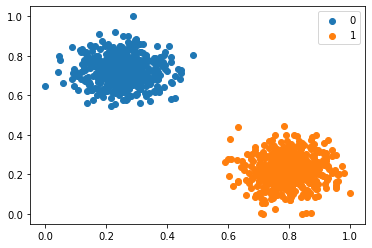

In [10]:
# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

### Sigmóide

In [11]:
reset_graph()

# define model
init = tf.keras.initializers.RandomUniform(minval=0, maxval=1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid', kernel_initializer=init, name='denseIn'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden1'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden2'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden3'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden4'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden5'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden6'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden7'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden8'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden9'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', kernel_initializer=init, name='denseHidden10'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init, name='denseOut'))

# compile model
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# prepare callback
tb = tf.keras.callbacks.TensorBoard(histogram_freq=1, write_grads=True, log_dir='./logs_sigmoid')

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, callbacks=[tb])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 500 samples, validate on 500 samples
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Epoch 1/500
500/500 [==============================] - 1s 2ms/sample - loss: 0.7820 - acc: 0.4820 - val_loss: 0.7203 - val_acc: 0.5180
Epoch 2/500
500/500 [==============================] - 0s 209us/sample - loss: 0.7189 - acc: 0.4820 - val_loss: 0.6928 - val_acc: 0.5180
Epoch 3/500
500/500 [==============================] - 0s 234us/sample - loss: 0.6936 - acc: 0.4860 - val_loss: 0.6939 - val_acc: 0.4820
Epoch 4/500
500/500 [==============================] - 0s 235us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6964 - val_acc: 0.4820
Epoch 5/500
500/500 [==============================] - 0s 278us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6958 - val_acc: 0.4820
Epoch 6/500
500/500 [===============

Epoch 53/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4820
Epoch 54/500
500/500 [==============================] - 0s 260us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 55/500
500/500 [==============================] - 0s 300us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 56/500
500/500 [==============================] - 0s 334us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6958 - val_acc: 0.4820
Epoch 57/500
500/500 [==============================] - 0s 247us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 58/500
500/500 [==============================] - 0s 236us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 59/500
500/500 [==============================] - 0s 236us/sample - loss: 0.6933 - acc: 0.5180 - val_loss: 0.6954 - val_acc: 0.4820
Epoch 60/500
500/500 [============

500/500 [==============================] - 0s 249us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 113/500
500/500 [==============================] - 0s 345us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6949 - val_acc: 0.4820
Epoch 114/500
500/500 [==============================] - 0s 268us/sample - loss: 0.6945 - acc: 0.5180 - val_loss: 0.6942 - val_acc: 0.4820
Epoch 115/500
500/500 [==============================] - 0s 352us/sample - loss: 0.6925 - acc: 0.5180 - val_loss: 0.6962 - val_acc: 0.4820
Epoch 116/500
500/500 [==============================] - 0s 325us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6968 - val_acc: 0.4820
Epoch 117/500
500/500 [==============================] - 0s 320us/sample - loss: 0.6933 - acc: 0.5180 - val_loss: 0.6956 - val_acc: 0.4820
Epoch 118/500
500/500 [==============================] - 0s 238us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 119/500
500/500 [==================

500/500 [==============================] - 0s 540us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6956 - val_acc: 0.4820
Epoch 172/500
500/500 [==============================] - 0s 312us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 173/500
500/500 [==============================] - 0s 302us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6948 - val_acc: 0.4820
Epoch 174/500
500/500 [==============================] - 0s 300us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6962 - val_acc: 0.4820
Epoch 175/500
500/500 [==============================] - 0s 268us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 176/500
500/500 [==============================] - 0s 267us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 177/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 178/500
500/500 [==================

500/500 [==============================] - 0s 245us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 231/500
500/500 [==============================] - 0s 259us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 232/500
500/500 [==============================] - 0s 258us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6954 - val_acc: 0.4820
Epoch 233/500
500/500 [==============================] - 0s 482us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 234/500
500/500 [==============================] - 0s 234us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 235/500
500/500 [==============================] - 0s 237us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 236/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6957 - val_acc: 0.4820
Epoch 237/500
500/500 [==================

500/500 [==============================] - 0s 560us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 290/500
500/500 [==============================] - 0s 461us/sample - loss: 0.6931 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 291/500
500/500 [==============================] - 0s 236us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6949 - val_acc: 0.4820
Epoch 292/500
500/500 [==============================] - 0s 391us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4820
Epoch 293/500
500/500 [==============================] - 0s 479us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 294/500
500/500 [==============================] - 0s 390us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 295/500
500/500 [==============================] - 0s 268us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 296/500
500/500 [==================

500/500 [==============================] - 0s 234us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6956 - val_acc: 0.4820
Epoch 349/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4820
Epoch 350/500
500/500 [==============================] - 0s 260us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6951 - val_acc: 0.4820
Epoch 351/500
500/500 [==============================] - 0s 258us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 352/500
500/500 [==============================] - 0s 258us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6947 - val_acc: 0.4820
Epoch 353/500
500/500 [==============================] - 0s 234us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 354/500
500/500 [==============================] - 0s 235us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6948 - val_acc: 0.4820
Epoch 355/500
500/500 [==================

500/500 [==============================] - 0s 260us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6954 - val_acc: 0.4820
Epoch 408/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 409/500
500/500 [==============================] - 0s 259us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6952 - val_acc: 0.4820
Epoch 410/500
500/500 [==============================] - 0s 258us/sample - loss: 0.6926 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 411/500
500/500 [==============================] - 0s 237us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6941 - val_acc: 0.4820
Epoch 412/500
500/500 [==============================] - 0s 234us/sample - loss: 0.6928 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 413/500
500/500 [==============================] - 0s 235us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6956 - val_acc: 0.4820
Epoch 414/500
500/500 [==================

500/500 [==============================] - 0s 260us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6945 - val_acc: 0.4820
Epoch 467/500
500/500 [==============================] - 0s 236us/sample - loss: 0.6929 - acc: 0.5180 - val_loss: 0.6958 - val_acc: 0.4820
Epoch 468/500
500/500 [==============================] - 0s 237us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6950 - val_acc: 0.4820
Epoch 469/500
500/500 [==============================] - 0s 234us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6944 - val_acc: 0.4820
Epoch 470/500
500/500 [==============================] - 0s 258us/sample - loss: 0.6927 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 471/500
500/500 [==============================] - 0s 256us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 472/500
500/500 [==============================] - 0s 281us/sample - loss: 0.6930 - acc: 0.5180 - val_loss: 0.6946 - val_acc: 0.4820
Epoch 473/500
500/500 [==================

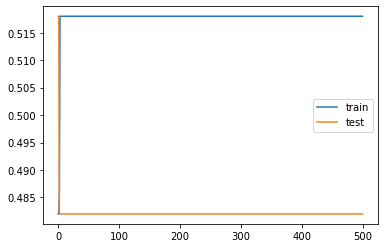

In [14]:
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

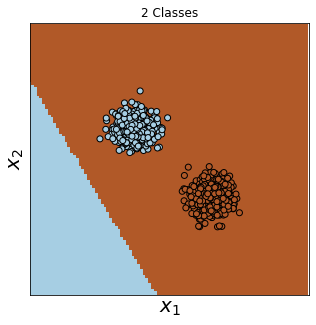

In [15]:
plot_decision_boundary(model, X, y, '2 Classes')

### As vezes é necessário se executar estas duas linhas.

taskkill /im tensorboard.exe /f

del /q %TMP%\.tensorboard-info\*

In [19]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard
%reload_ext tensorboard

In [21]:
%tensorboard --logdir './logs_sigmoid'

Reusing TensorBoard on port 6006 (pid 13956), started 0:00:49 ago. (Use '!kill 13956' to kill it.)

### ReLU

In [22]:
reset_graph()

# define model
init = tf.keras.initializers.RandomUniform(minval=0, maxval=1)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu', kernel_initializer=init, name='denseIn'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden1'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden2'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden3'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden4'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden5'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden6'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden7'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden8'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden9'))
model.add(tf.keras.layers.Dense(2, activation='relu', kernel_initializer=init, name='denseHidden10'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=init, name='denseOut'))

# compile model
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# prepare callback
tb = tf.keras.callbacks.TensorBoard(histogram_freq=1, write_grads=True, log_dir='./logs_relu')

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, callbacks=[tb])

Train on 500 samples, validate on 500 samples
Epoch 1/500
500/500 [==============================] - 1s 3ms/sample - loss: 0.6751 - acc: 0.7060 - val_loss: 0.6181 - val_acc: 0.7380
Epoch 2/500
500/500 [==============================] - 0s 272us/sample - loss: 0.5932 - acc: 0.7260 - val_loss: 0.4871 - val_acc: 0.7260
Epoch 3/500
500/500 [==============================] - 0s 268us/sample - loss: 0.3907 - acc: 0.8780 - val_loss: 0.2655 - val_acc: 0.9780
Epoch 4/500
500/500 [==============================] - 0s 320us/sample - loss: 0.2480 - acc: 0.9900 - val_loss: 0.1982 - val_acc: 1.0000
Epoch 5/500
500/500 [==============================] - 0s 290us/sample - loss: 0.1917 - acc: 1.0000 - val_loss: 0.1567 - val_acc: 1.0000
Epoch 6/500
500/500 [==============================] - 0s 260us/sample - loss: 0.1552 - acc: 0.9980 - val_loss: 0.1282 - val_acc: 1.0000
Epoch 7/500
500/500 [==============================] - 0s 364us/sample - loss: 0.1279 - acc: 1.0000 - val_loss: 0.1078 - val_acc: 1.00

Epoch 58/500
500/500 [==============================] - 0s 316us/sample - loss: 0.0116 - acc: 1.0000 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 59/500
500/500 [==============================] - 0s 354us/sample - loss: 0.0114 - acc: 1.0000 - val_loss: 0.0104 - val_acc: 1.0000
Epoch 60/500
500/500 [==============================] - 0s 338us/sample - loss: 0.0112 - acc: 1.0000 - val_loss: 0.0103 - val_acc: 1.0000
Epoch 61/500
500/500 [==============================] - 0s 426us/sample - loss: 0.0110 - acc: 1.0000 - val_loss: 0.0101 - val_acc: 1.0000
Epoch 62/500
500/500 [==============================] - 0s 382us/sample - loss: 0.0108 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 63/500
500/500 [==============================] - 0s 292us/sample - loss: 0.0106 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 64/500
500/500 [==============================] - 0s 318us/sample - loss: 0.0104 - acc: 1.0000 - val_loss: 0.0096 - val_acc: 1.0000
Epoch 65/500
500/500 [============

500/500 [==============================] - 0s 366us/sample - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 118/500
500/500 [==============================] - 0s 318us/sample - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 119/500
500/500 [==============================] - 0s 340us/sample - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 120/500
500/500 [==============================] - 0s 300us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 121/500
500/500 [==============================] - 0s 320us/sample - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 122/500
500/500 [==============================] - 0s 434us/sample - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 123/500
500/500 [==============================] - 0s 362us/sample - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 124/500
500/500 [==================

500/500 [==============================] - 0s 380us/sample - loss: 0.0037 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 177/500
500/500 [==============================] - 0s 346us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 178/500
500/500 [==============================] - 0s 336us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 179/500
500/500 [==============================] - ETA: 0s - loss: 0.0030 - acc: 1.000 - 0s 342us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 180/500
500/500 [==============================] - 0s 558us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 181/500
500/500 [==============================] - 0s 602us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 182/500
500/500 [==============================] - 0s 676us/sample - loss: 0.0035 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epo

Epoch 235/500
500/500 [==============================] - 0s 378us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 236/500
500/500 [==============================] - 0s 450us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 237/500
500/500 [==============================] - 0s 276us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 238/500
500/500 [==============================] - 0s 256us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 239/500
500/500 [==============================] - 0s 278us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 240/500
500/500 [==============================] - 0s 370us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 241/500
500/500 [==============================] - 0s 366us/sample - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 242/500
500/500 [====

Epoch 294/500
500/500 [==============================] - 0s 280us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 295/500
500/500 [==============================] - 0s 276us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 296/500
500/500 [==============================] - 0s 278us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 297/500
500/500 [==============================] - 0s 296us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 298/500
500/500 [==============================] - 0s 300us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 299/500
500/500 [==============================] - 0s 274us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 300/500
500/500 [==============================] - 0s 298us/sample - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 301/500
500/500 [====

Epoch 353/500
500/500 [==============================] - 0s 362us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 354/500
500/500 [==============================] - 0s 298us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 355/500
500/500 [==============================] - 0s 350us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 356/500
500/500 [==============================] - 0s 880us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 357/500
500/500 [==============================] - 0s 358us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 358/500
500/500 [==============================] - 0s 320us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 359/500
500/500 [==============================] - 0s 338us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 360/500
500/500 [====

Epoch 412/500
500/500 [==============================] - 0s 296us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 413/500
500/500 [==============================] - 0s 256us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 414/500
500/500 [==============================] - 0s 256us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 415/500
500/500 [==============================] - 0s 302us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 416/500
500/500 [==============================] - 0s 280us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 417/500
500/500 [==============================] - 0s 276us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 418/500
500/500 [==============================] - 0s 278us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 419/500
500/500 [====

Epoch 471/500
500/500 [==============================] - 0s 478us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 472/500
500/500 [==============================] - 0s 278us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 473/500
500/500 [==============================] - 0s 814us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 474/500
500/500 [==============================] - 0s 482us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 475/500
500/500 [==============================] - 0s 300us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 476/500
500/500 [==============================] - 0s 326us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 477/500
500/500 [==============================] - 0s 332us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 478/500
500/500 [====

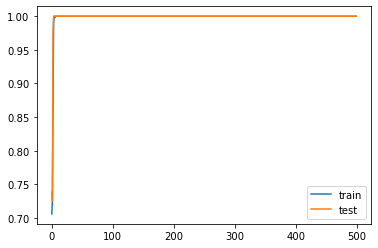

In [23]:
# plot training history
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

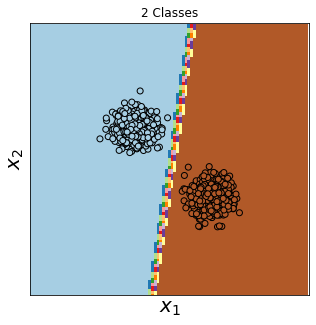

In [25]:
plot_decision_boundary(model, X, y, '2 Classes')

In [29]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
#%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [31]:
%tensorboard --logdir './logs_relu'

Reusing TensorBoard on port 6006 (pid 7752), started 0:01:37 ago. (Use '!kill 7752' to kill it.)